In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
df = pd.read_csv("Lab1/Lab1/PS/q3/air_quality_data.csv")
df

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI
0,42.918,1.004,69.971,56.767,7.803,19.689,73.333,8.767,39.068
1,43.599,0.788,66.189,77.334,8.436,28.071,45.645,6.638,23.578
2,54.738,1.625,74.835,67.327,7.617,9.203,49.427,10.607,68.181
3,147.763,1.383,81.405,43.321,5.718,4.932,51.096,7.959,56.705
4,60.479,0.873,70.216,38.652,7.302,25.370,58.998,9.078,48.963
...,...,...,...,...,...,...,...,...,...
995,53.162,0.834,65.232,52.177,6.779,34.128,45.066,11.312,64.739
996,68.374,1.414,89.351,31.256,4.328,9.514,59.266,5.636,50.412
997,54.569,0.935,74.796,31.074,7.107,-3.357,26.648,5.209,26.847
998,106.209,1.325,59.218,76.898,4.269,9.838,57.374,3.979,80.734


In [3]:
df.describe()

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,68.991707,1.126097,73.896745,59.659579,6.192821,15.528024,46.787774,6.050360,50.374081
std,39.521103,0.564139,25.016806,25.187067,2.634858,11.638852,19.335416,2.744414,18.393589
min,26.217000,0.511000,39.654000,5.000000,1.213000,-22.366000,5.000000,0.300000,0.000000
25%,47.049000,0.840750,60.517000,40.538500,4.299500,7.853000,33.292750,4.250250,38.248500
50%,58.553500,1.021500,69.920000,59.675500,5.818000,15.542500,46.624000,5.760500,48.738000
75%,78.262250,1.240250,81.374250,78.594000,7.606500,23.172750,60.026000,7.594500,59.724000
max,478.488000,7.104000,306.894000,130.427000,22.509000,47.651000,95.000000,15.000000,169.900000


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
cols = list(df.columns)[:-1]
cols_normalized = []
for col in cols:
    df[f"{col}_normalized"] = (df[col]-df[col].sum())/df[col].std()
    cols_normalized.append(f"{col}_normalized")

In [6]:
X = df[cols]
model1 = LinearRegression()
model1.fit(X, df['AQI'])

X2 = df[cols_normalized]
model2 = LinearRegression()
model2.fit(X2, df["AQI"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
model1.coef_

array([ 1.09939800e-01,  2.21095648e+01, -1.17763867e-01, -3.37875103e-02,
       -2.09392902e-01,  1.03932958e-02,  4.43324531e-02, -5.56230063e-02])

In [10]:
model2.coef_

array([ 4.34494221, 12.47287203, -2.94607586, -0.85100827, -0.55172056,
        0.12096603,  0.85718643, -0.15265254])

In [20]:
arr = np.argsort(model1.coef_)
print(model1.coef_[arr[-1]], cols[arr[-1]])

22.109564792660652 CO_ppm


In [18]:
arr = np.argsort(model2.coef_)
print(model2.coef_[arr[-1]], cols_normalized[arr[-1]])

12.472872030716971 CO_ppm_normalized


# Task 2

In [21]:
from sklearn.linear_model import Ridge

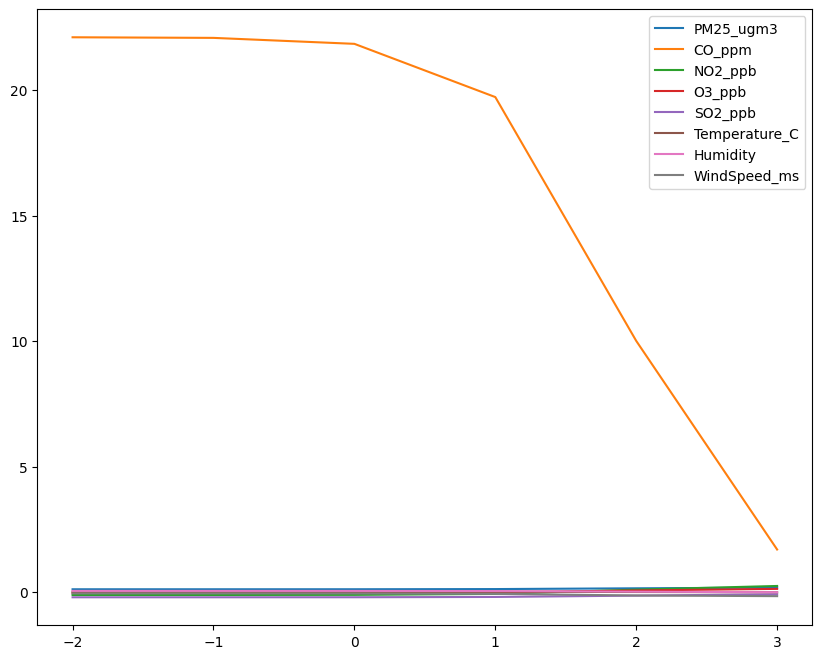

In [38]:
lambd = [0.01,0.1,1,10,100,1000]
coefs = []
for l in lambd:
    M_l = Ridge(alpha = l)
    M_l.fit(df[cols], df["AQI"])
    coefs.append(M_l.coef_)
    
coefs  = np.stack(coefs, axis=0)
plt.figure(figsize=(10, 8))

plt.plot(np.log10(lambd), coefs)
plt.legend(labels=cols)



In [39]:
for i in range(len(cols)):
    if cols[i]=="CO_ppm":
        print(i)

1


In [40]:
coefs_trunc = np.concatenate([coefs[:, 0:1], coefs[:, 2:]], axis=1)

In [41]:
cols_trunc = cols[0:1]+cols[2:]

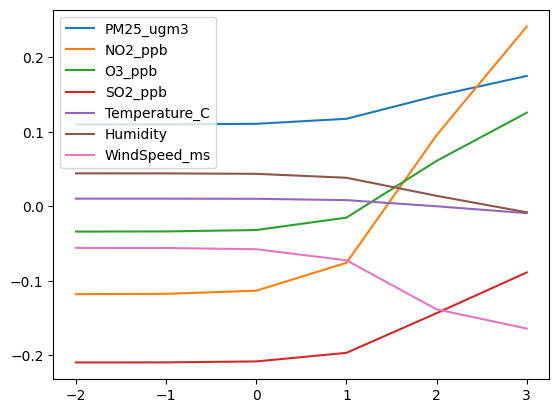

In [43]:
plt.plot(np.log10(lambd), coefs_trunc)
plt.legend(labels = cols_trunc)

Coefs of everything other than CO_ppm are pretty small, and that of NO2_ppb rises pretty fast. Coef of CO_ppm falls quite rapidly as lambda increases

# Task 3

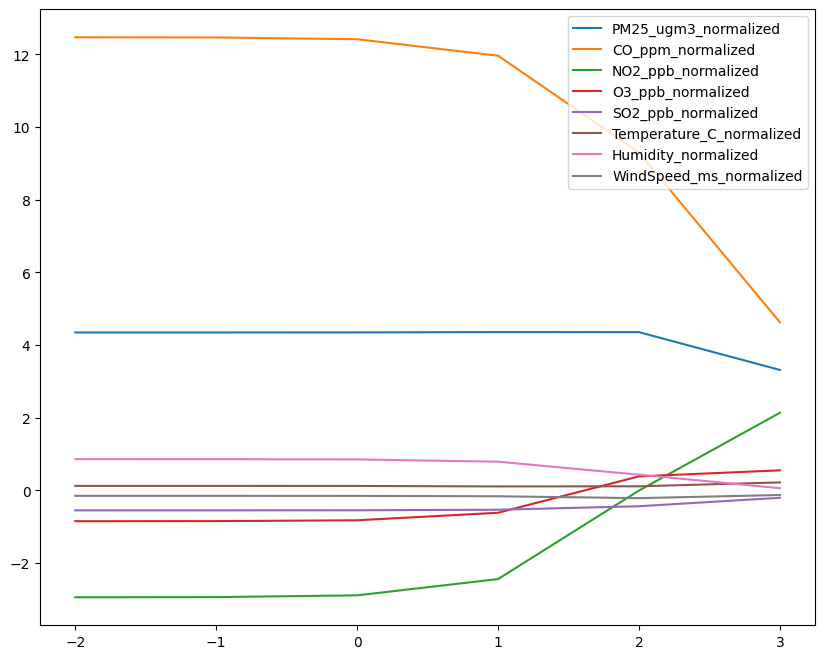

In [44]:
lambd = [0.01,0.1,1,10,100,1000]
coefs = []
for l in lambd:
    M_l = Ridge(alpha = l)
    M_l.fit(df[cols_normalized], df["AQI"])
    coefs.append(M_l.coef_)
    
coefs  = np.stack(coefs, axis=0)
plt.figure(figsize=(10, 8))

plt.plot(np.log10(lambd), coefs)
plt.legend(labels=cols_normalized)

At lambda = 10, PM25 and CO and No2 have substantial values.

# Task 4

In [45]:
from sklearn.linear_model import Lasso

In [52]:
lambd = [0.01]
for i in range(6):
    lambd.append(lambd[i]*10)

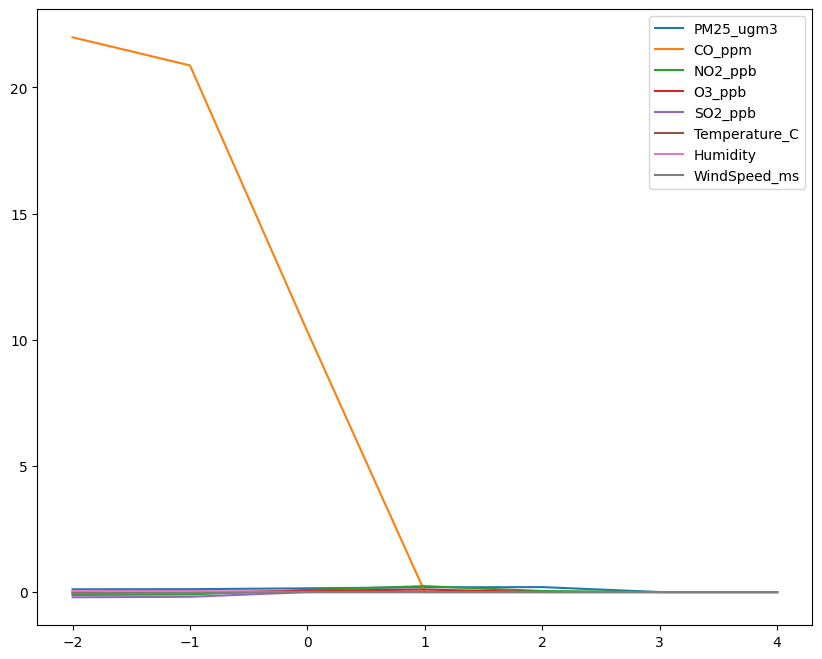

In [105]:
coefs = []
for l in lambd:
    md = Lasso(alpha = l)
    md.fit(df[cols], df["AQI"])
    coefs.append(md.coef_)

coefs = np.stack(coefs, axis=0)
plt.figure(figsize=(10, 8))
plt.plot(np.log10( lambd), coefs)
plt.legend(labels = cols)

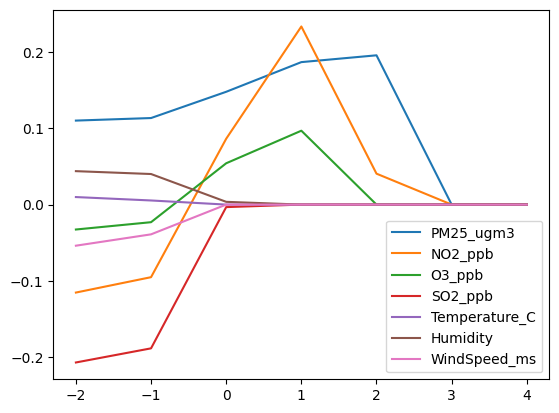

In [106]:
coefs_trunc = np.concatenate([coefs[:, 0:1], coefs[:, 2:]], axis=1)
cols_trunc = cols[0:1]+cols[2:]
plt.plot(np.log10(lambd), coefs_trunc)
plt.legend(labels = cols_trunc)

In [108]:
featureTable = {}
for i in range(len(cols)):
    coefarr =  coefs[:, i:i+1]
    coeffarr = coefarr.flatten()
    msk = np.where(abs(coeffarr) < 1e-2)
    ft = np.min(msk)
    featureTable[cols[i]]=[ft]

pd.DataFrame(featureTable, index=None)

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms
0,5,3,5,4,2,0,2,2


# Task 5

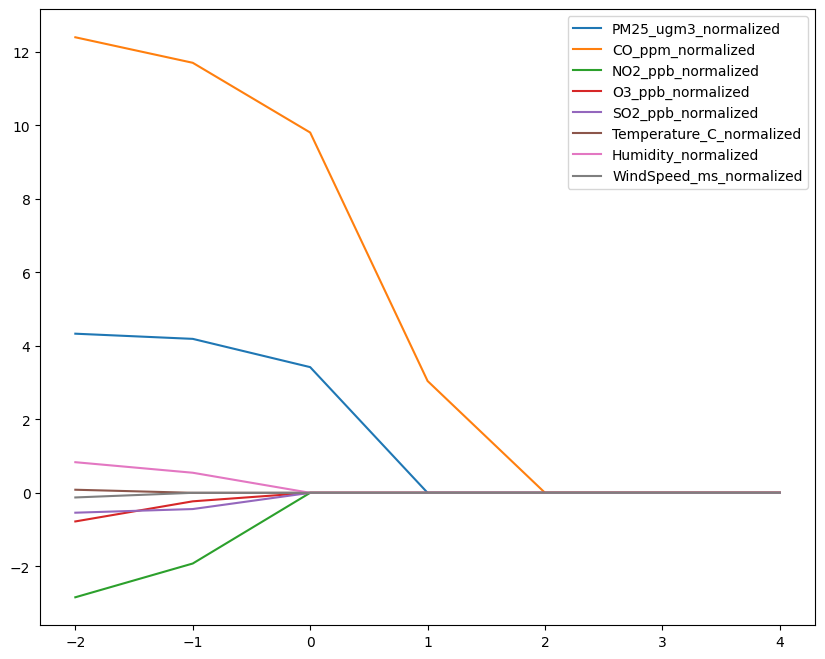

In [66]:
coefs = []
for l in lambd:
    md = Lasso(alpha = l)
    md.fit(df[cols_normalized], df["AQI"])
    coefs.append(md.coef_)

coefs = np.stack(coefs, axis=0)
plt.figure(figsize=(10, 8))
plt.plot(np.log10( lambd), coefs)
plt.legend(labels = cols_normalized)

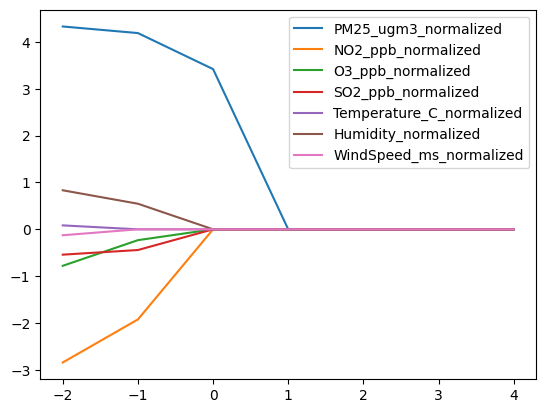

In [67]:
coefs_trunc = np.concatenate([coefs[:, 0:1], coefs[:, 2:]], axis=1)
cols_trunc = cols_normalized[0:1]+cols_normalized[2:]
plt.plot(np.log10(lambd), coefs_trunc)
plt.legend(labels = cols_trunc)

In [68]:
featureTable = {}
for i in range(len(cols)):
    coefarr =  coefs[:, i:i+1]
    coeffarr = coefarr.flatten()
    msk = np.where(coeffarr < 1e-4)
    ft = np.min(msk)
    featureTable[cols[i]]=[ft]

pd.DataFrame(featureTable, index=None)

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms
0,3,4,0,0,0,1,2,0


Nothing too good, CO is best as ever, others drop out early thats all

# Task 6

In [69]:
df.describe()

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI,PM25_ugm3_normalized,CO_ppm_normalized,NO2_ppb_normalized,O3_ppb_normalized,SO2_ppb_normalized,Temperature_C_normalized,Humidity_normalized,WindSpeed_ms_normalized
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,68.991707,1.126097,73.896745,59.659579,6.192821,15.528024,46.787774,6.050360,50.374081,-1743.947147,-1994.137117,-2950.930164,-2366.290622,-2347.993047,-1332.820129,-2417.376788,-2202.404640
std,39.521103,0.564139,25.016806,25.187067,2.634858,11.638852,19.335416,2.744414,18.393589,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,26.217000,0.511000,39.654000,5.000000,1.213000,-22.366000,5.000000,0.300000,0.000000,-1745.029473,-1995.227445,-2952.298953,-2368.460767,-2349.883024,-1336.075951,-2419.537992,-2204.499937
25%,47.049000,0.840750,60.517000,40.538500,4.299500,7.853000,33.292750,4.250250,38.248500,-1744.502362,-1994.642926,-2951.464994,-2367.049785,-2348.711613,-1333.479561,-2418.074731,-2203.060558
50%,58.553500,1.021500,69.920000,59.675500,5.818000,15.542500,46.624000,5.760500,48.738000,-1744.211264,-1994.322527,-2951.089127,-2366.289990,-2348.135301,-1332.818886,-2417.385258,-2202.510259
75%,78.262250,1.240250,81.374250,78.594000,7.606500,23.172750,60.026000,7.594500,59.724000,-1743.712575,-1993.934768,-2950.631264,-2365.538870,-2347.456517,-1332.163301,-2416.692126,-2201.841992
max,478.488000,7.104000,306.894000,130.427000,22.509000,47.651000,95.000000,15.000000,169.900000,-1733.585688,-1983.540613,-2941.616535,-2363.480949,-2341.800615,-1330.060151,-2414.883321,-2199.143602


<Axes: >

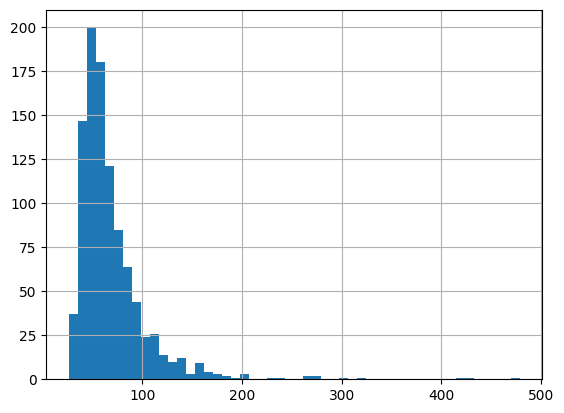

In [87]:
df["PM25_ugm3"].hist(bins=50)

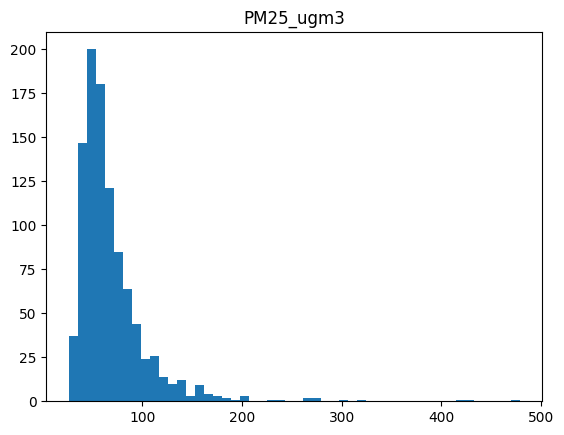

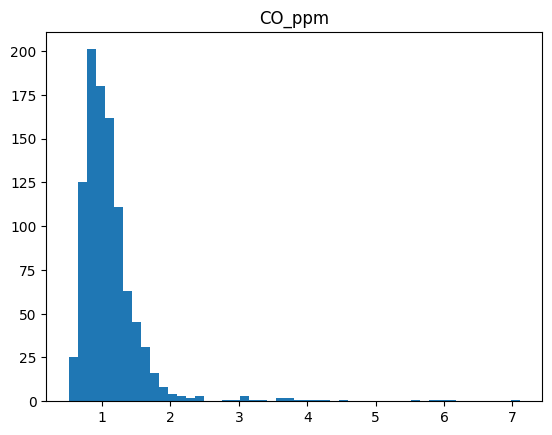

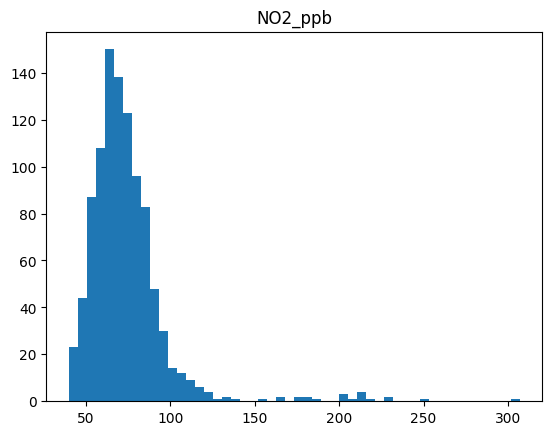

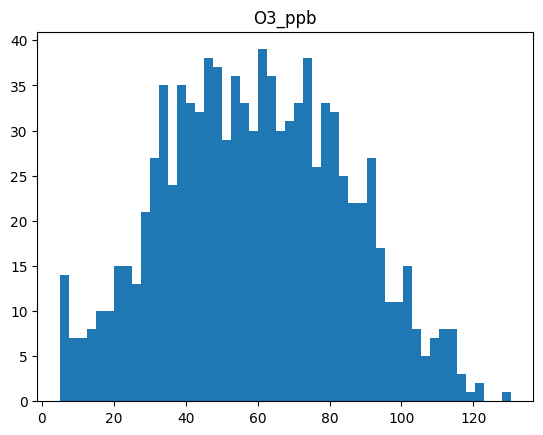

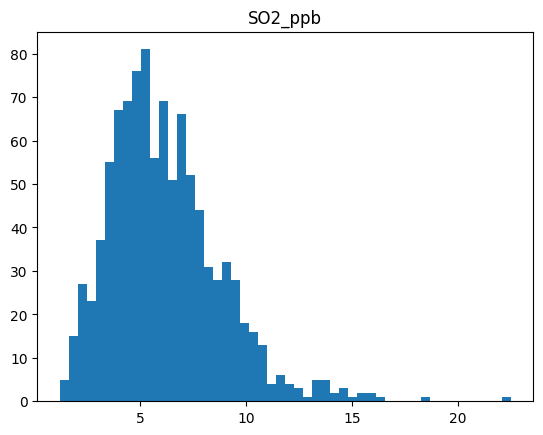

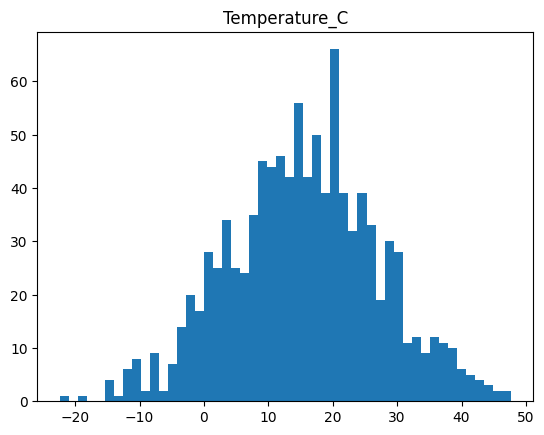

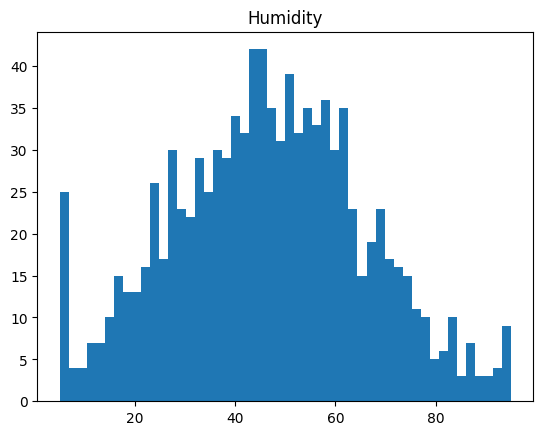

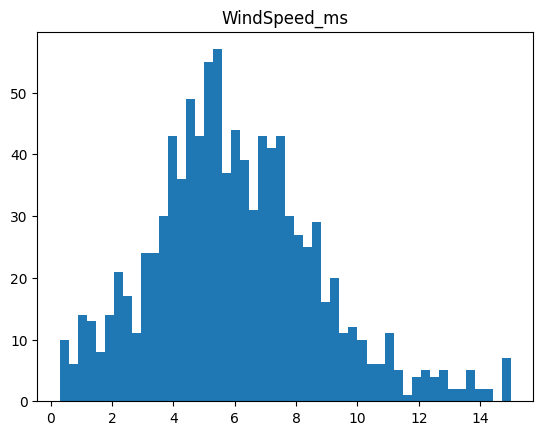

In [89]:
for col in cols:
    plt.figure()
    plt.hist(df[col], bins=50)
    plt.title(col)

In [93]:
outliers = {
    "PM25_ugm3" : 210,
    "WindSpeed_ms" : 1000,
    "Humidity" : 1000,
    "Temperature_C" : 1000,
    "SO2_ppb" : 15,
    "O3_ppb" : 1000,
    "NO2_ppb": 150,
    "CO_ppm": 2.6
}

In [94]:
msk = np.ones((len(df),), dtype="bool")
for col in cols:
    msk &= (df[col]<outliers[col])

In [95]:
df_A = df[msk]

In [96]:
df_A

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI,PM25_ugm3_normalized,CO_ppm_normalized,NO2_ppb_normalized,O3_ppb_normalized,SO2_ppb_normalized,Temperature_C_normalized,Humidity_normalized,WindSpeed_ms_normalized
0,42.918,1.004,69.971,56.767,7.803,19.689,73.333,8.767,39.068,-1744.606888,-1994.353547,-2951.087088,-2366.405466,-2347.381940,-1332.462622,-2416.003907,-2201.414760
1,43.599,0.788,66.189,77.334,8.436,28.071,45.645,6.638,23.578,-1744.589657,-1994.736432,-2951.238266,-2365.588896,-2347.141699,-1331.742448,-2417.435890,-2202.190518
2,54.738,1.625,74.835,67.327,7.617,9.203,49.427,10.607,68.181,-1744.307808,-1993.252755,-2950.892659,-2365.986203,-2347.452532,-1333.363570,-2417.240291,-2200.744308
3,147.763,1.383,81.405,43.321,5.718,4.932,51.096,7.959,56.705,-1741.954002,-1993.681727,-2950.630035,-2366.939311,-2348.173254,-1333.730531,-2417.153973,-2201.709177
4,60.479,0.873,70.216,38.652,7.302,25.370,58.998,9.078,48.963,-1744.162543,-1994.585760,-2951.077295,-2367.124684,-2347.572083,-1331.974515,-2416.745292,-2201.301439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53.162,0.834,65.232,52.177,6.779,34.128,45.066,11.312,64.739,-1744.347685,-1994.654892,-2951.276521,-2366.587702,-2347.770576,-1331.222036,-2417.465836,-2200.487422
996,68.374,1.414,89.351,31.256,4.328,9.514,59.266,5.636,50.412,-1743.962777,-1993.626776,-2950.312409,-2367.418327,-2348.700797,-1333.336849,-2416.731432,-2202.555623
997,54.569,0.935,74.796,31.074,7.107,-3.357,26.648,5.209,26.847,-1744.312084,-1994.475858,-2950.894218,-2367.425553,-2347.646091,-1334.442714,-2418.418388,-2202.711212
998,106.209,1.325,59.218,76.898,4.269,9.838,57.374,3.979,80.734,-1743.005440,-1993.784539,-2951.516919,-2365.606207,-2348.723189,-1333.309011,-2416.829283,-2203.159395


In [97]:
df = df.drop(columns = cols_normalized)

In [98]:
df

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI
0,42.918,1.004,69.971,56.767,7.803,19.689,73.333,8.767,39.068
1,43.599,0.788,66.189,77.334,8.436,28.071,45.645,6.638,23.578
2,54.738,1.625,74.835,67.327,7.617,9.203,49.427,10.607,68.181
3,147.763,1.383,81.405,43.321,5.718,4.932,51.096,7.959,56.705
4,60.479,0.873,70.216,38.652,7.302,25.370,58.998,9.078,48.963
...,...,...,...,...,...,...,...,...,...
995,53.162,0.834,65.232,52.177,6.779,34.128,45.066,11.312,64.739
996,68.374,1.414,89.351,31.256,4.328,9.514,59.266,5.636,50.412
997,54.569,0.935,74.796,31.074,7.107,-3.357,26.648,5.209,26.847
998,106.209,1.325,59.218,76.898,4.269,9.838,57.374,3.979,80.734


In [99]:
for col in cols:
    df[f"{col}_normalized"] = (df[col]-np.percentile(df[col], 50))/(np.percentile(df[col], 75)-np.percentile(df[col], 25))

In [100]:
df

,PM25_ugm3,CO_ppm,NO2_ppb,O3_ppb,SO2_ppb,Temperature_C,Humidity,WindSpeed_ms,AQI,PM25_ugm3_normalized,CO_ppm_normalized,NO2_ppb_normalized,O3_ppb_normalized,SO2_ppb_normalized,Temperature_C_normalized,Humidity_normalized,WindSpeed_ms_normalized
0,42.918,1.004,69.971,56.767,7.803,19.689,73.333,8.767,39.068,-0.500925,-0.043805,0.002445,-0.076428,0.600242,0.270664,0.999093,0.899006
1,43.599,0.788,66.189,77.334,8.436,28.071,45.645,6.638,23.578,-0.479107,-0.584481,-0.178883,0.464020,0.791654,0.817801,-0.036621,0.262391
2,54.738,1.625,74.835,67.327,7.617,9.203,49.427,10.607,68.181,-0.122240,1.510638,0.235649,0.201062,0.543998,-0.413812,0.104851,1.449204
3,147.763,1.383,81.405,43.321,5.718,4.932,51.096,7.959,56.705,2.858065,0.904881,0.550648,-0.429754,-0.030239,-0.692603,0.167282,0.657397
4,60.479,0.873,70.216,38.652,7.302,25.370,58.998,9.078,48.963,0.061689,-0.371715,0.014192,-0.552443,0.448745,0.641492,0.462869,0.992001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53.162,0.834,65.232,52.177,6.779,34.128,45.066,11.312,64.739,-0.172731,-0.469337,-0.224766,-0.197041,0.290596,1.213173,-0.058279,1.660013
996,68.374,1.414,89.351,31.256,4.328,9.514,59.266,5.636,50.412,0.314626,0.982478,0.931619,-0.746791,-0.450559,-0.393512,0.472894,-0.037228
997,54.569,0.935,74.796,31.074,7.107,-3.357,26.648,5.209,26.847,-0.127654,-0.216521,0.233780,-0.751573,0.389779,-1.233669,-0.747234,-0.164910
998,106.209,1.325,59.218,76.898,4.269,9.838,57.374,3.979,80.734,1.526771,0.759700,-0.513107,0.452563,-0.468400,-0.372362,0.402121,-0.532705


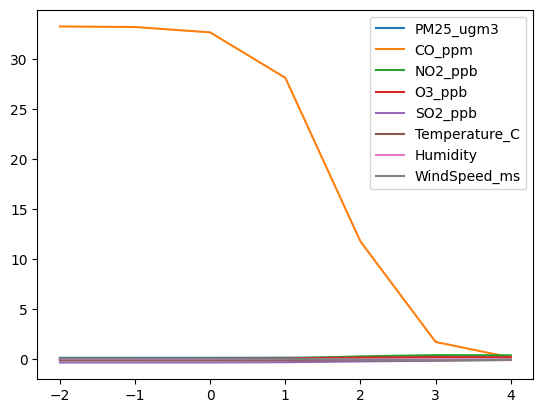

In [101]:
coefs = []
for l in lambd:
    md = Ridge(alpha=l)
    md.fit(df_A[cols], df_A["AQI"])
    coefs.append(md.coef_)

coefs = np.stack(coefs, axis=0)
plt.plot(np.log10(lambd), coefs)
plt.legend(labels=cols)


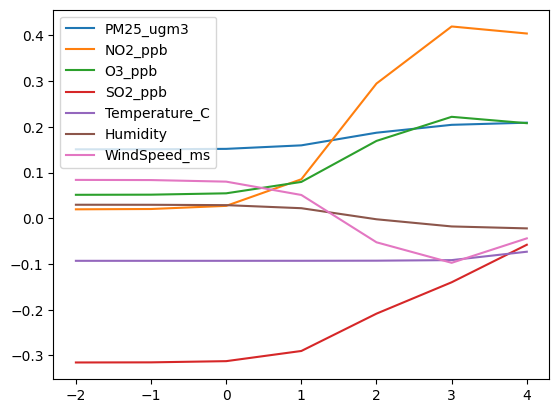

In [102]:
coefs_trunc = np.concatenate([coefs[:, 0:1], coefs[:, 2:]], axis=1)
cols_trunc = cols[0:1]+cols[2:]
plt.plot(np.log10(lambd), coefs_trunc)
plt.legend(labels = cols_trunc)

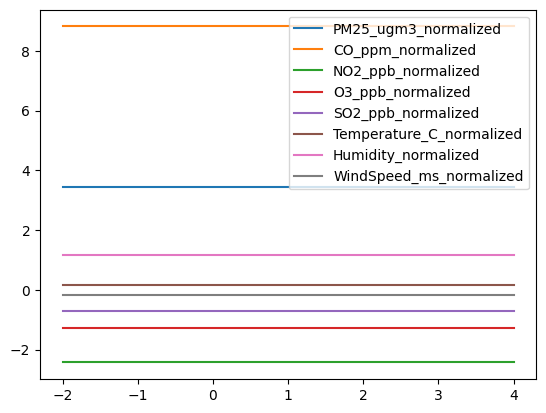

In [104]:
coefs = []
for l in lambd:
    md = Ridge(alpha=1)
    md.fit(df[cols_normalized], df["AQI"])
    coefs.append(md.coef_)

coefs= np.stack(coefs, axis=0)
plt.plot(np.log10(lambd), coefs)
plt.legend(labels= cols_normalized)